In [1]:
import pandas as pd
# Import Pandas to use DataFrames
import swifter
# To efficiently apply any function to a Pandas Data Frame or Series object in the quickest available method
import numpy as np
# Import Numpy which will hel in mathematical calculations 
import matplotlib.pyplot as plt
import seaborn as sns
# To Visualize Data
import json
# To Read Json Files
import os
# To Access system files/options
import glob
# To return all file paths that match a specific pattern
from tqdm import tqdm
# To Display progress when using loops

#-----------------------------------------------------------------------

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
# To make feature extraction from spotify app

#-----------------------------------------------------------------------

import statsmodels
import sklearn
# To perform Statistical Analysis 
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA # Import the PCA class function from sklearn




pd.set_option('display.max_columns', None)
pd.set_option("display.precision", 2)
# Tune some options in pandas 


%matplotlib inline
# To make any plot appear in jupyter notebook

In [2]:
DATASETS_PATH = 'C:/Users/LENOVO/Downloads/feature_engineering_dataset.csv' # change to the path of your csv file
# df_modified = pd.read_csv(os.path.join(DATASETS_PATH, 'feature_engineering_dataset.csv'))
df_modified = pd.read_csv(DATASETS_PATH)

In [3]:
df_modified

,pid,name,description,modified_at,num_artists,num_albums,num_tracks,num_followers,num_edits,playlist_duration_ms,collaborative,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms,album_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,uri,track_href,analysis_url,time_signature,playlist_followers_artist,playlist_followers_album,playlist_followers_track
0,0,Throwbacks,NaN,1493424000,37,47,52,1,6,11532414,0,0,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.90,0.81,4,-7.11,0,0.12,3.11e-02,6.97e-03,0.05,0.81,125.46,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,126,22,21
1,123,w o r k o u t,NaN,1500681600,171,225,245,1,26,55676545,0,73,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.90,0.81,4,-7.11,0,0.12,3.11e-02,6.97e-03,0.05,0.81,125.46,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,126,22,21
2,218,party playlist,NaN,1504310400,74,93,98,1,4,21299385,0,14,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.90,0.81,4,-7.11,0,0.12,3.11e-02,6.97e-03,0.05,0.81,125.46,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,126,22,21
3,342,Dance mix,NaN,1473724800,111,127,167,1,15,43330767,0,42,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.90,0.81,4,-7.11,0,0.12,3.11e-02,6.97e-03,0.05,0.81,125.46,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,126,22,21
4,382,spin,NaN,1505347200,13,14,14,2,5,3617477,0,1,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.90,0.81,4,-7.11,0,0.12,3.11e-02,6.97e-03,0.05,0.81,125.46,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,126,22,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266358,3999,other,NaN,1420848000,17,56,97,1,9,22548683,0,28,Jason Mraz,spotify:track:3ce7k1L4EkZppZPz1EJWTS,spotify:artist:4phGZZrJZRo4ElhRtViYdl,Living In The Moment,spotify:album:64SChsjQBiEe3aVTFYnW1b,235080,Love Is A Four Letter Word,0.65,0.63,7,-7.16,1,0.02,4.83e-02,0.00e+00,0.12,0.70,84.14,3ce7k1L4EkZppZPz1EJWTS,spotify:track:3ce7k1L4EkZppZPz1EJWTS,https://api.spotify.com/v1/tracks/3ce7k1L4EkZp...,https://api.spotify.com/v1/audio-analysis/3ce7...,4,248,79,1
266359,3999,other,NaN,1420848000,17,56,97,1,9,22548683,0,36,The Cure,spotify:track:6DW7MN6DCVvTDjtcL5IM9a,spotify:artist:7bu3H8JO7d0UbMoVzbo70s,Pictures Of You - Remix,spotify:album:3jRLyc2t1tExfVpdB88EUm,288106,Galore - The Singles 1987-1997,0.46,0.74,9,-6.10,1,0.03,4.48e-03,1.02e-02,0.12,0.63,172.72,6DW7MN6DCVvTDjtcL5IM9a,spotify:track:6DW7MN6DCVvTDjtcL5IM9a,https://api.spotify.com/v1/tracks/6DW7MN6DCVvT...,https://api.spotify.com/v1/audio-analysis/6DW7...,4,79,1,1
266360,3999,other,NaN,1420848000,17,56,97,1,9,22548683,0,37,The Cure

In [4]:
numerical_features = (df_modified.dtypes == 'int64') | (df_modified.dtypes == 'float64')
numerical_columns = []
for i in range(len(numerical_features)):
    if numerical_features[i]:
        numerical_columns.append(df_modified.columns[i])
numerical_columns

['pid',
 'modified_at',
 'num_artists',
 'num_albums',
 'num_tracks',
 'num_followers',
 'num_edits',
 'playlist_duration_ms',
 'collaborative',
 'pos',
 'duration_ms',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'time_signature',
 'playlist_followers_artist',
 'playlist_followers_album',
 'playlist_followers_track']

In [5]:
df_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266363 entries, 0 to 266362
Data columns (total 38 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   pid                        266363 non-null  int64  
 1   name                       266363 non-null  object 
 2   description                5333 non-null    object 
 3   modified_at                266363 non-null  int64  
 4   num_artists                266363 non-null  int64  
 5   num_albums                 266363 non-null  int64  
 6   num_tracks                 266363 non-null  int64  
 7   num_followers              266363 non-null  int64  
 8   num_edits                  266363 non-null  int64  
 9   playlist_duration_ms       266363 non-null  int64  
 10  collaborative              266363 non-null  int64  
 11  pos                        266363 non-null  int64  
 12  artist_name                266363 non-null  object 
 13  track_uri                  26

In [6]:
positive_skewed = []
negative_skewed = []
for i in range(len(df_modified[numerical_columns].columns)):
    if (df_modified[numerical_columns].skew()[i]>0):
        positive_skewed.append(df_modified[numerical_columns].skew().index[i])
    else:
        negative_skewed.append(df_modified[numerical_columns].skew().index[i])

In [7]:
len(positive_skewed)

20

In [8]:
len(numerical_columns)

26

In [9]:
positive_skewed

['pid',
 'num_artists',
 'num_albums',
 'num_tracks',
 'num_followers',
 'num_edits',
 'playlist_duration_ms',
 'collaborative',
 'pos',
 'duration_ms',
 'key',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'playlist_followers_artist',
 'playlist_followers_album',
 'playlist_followers_track']

In [10]:
negative_skewed = ["modified_at", "energy", "loudness", "time_signature"]

def tarnsform_columns(df, column, p):
    df1 = df.copy()
    if p == 'n':
        for i in range(len(df1[column].columns)):
            df1[df1[column].columns[i]] = np.exp(df1[df1[column].columns[i]])
    else:
            for i in range(len(df1[column].columns)):
                df1[df1[column].columns[i]] = np.log(((df1[df1[column].columns[i]])+1))
    return df1

In [12]:
def drawHist(df, column):
    fig, ax = plt.subplots()
    df[column].hist()
    ax.set_title(f"Skew Factor: {df[column].skew()}")
    ax.set_xlabel(f"{df[column].name}")
    return 0

0

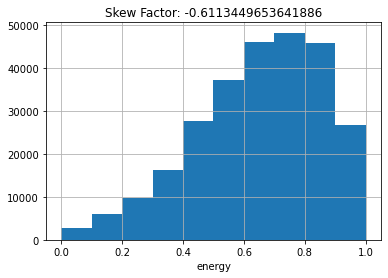

In [13]:
drawHist(df_modified, negative_skewed[1])

In [14]:
df_transformed = df_modified.copy()
df_transformed = tarnsform_columns(df_modified, negative_skewed, 'n')
df_transformed.head()

C:\Users\LENOVO\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


,pid,name,description,modified_at,num_artists,num_albums,num_tracks,num_followers,num_edits,playlist_duration_ms,collaborative,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms,album_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,uri,track_href,analysis_url,time_signature,playlist_followers_artist,playlist_followers_album,playlist_followers_track
0,0,Throwbacks,NaN,inf,37,47,52,1,6,11532414,0,0,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.9,2.25,4,8.21e-04,0,0.12,0.03,6.97e-03,0.05,0.81,125.46,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,54.6,126,22,21
1,123,w o r k o u t,NaN,inf,171,225,245,1,26,55676545,0,73,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.9,2.25,4,8.21e-04,0,0.12,0.03,6.97e-03,0.05,0.81,125.46,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,54.6,126,22,21
2,218,party playlist,NaN,inf,74,93,98,1,4,21299385,0,14,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.9,2.25,4,8.21e-04,0,0.12,0.03,6.97e-03,0.05,0.81,125.46,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,54.6,126,22,21
3,342,Dance mix,NaN,inf,111,127,167,1,15,43330767,0,42,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.9,2.25,4,8.21e-04,0,0.12,0.03,6.97e-03,0.05,0.81,125.46,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,54.6,126,22,21
4,382,spin,NaN,inf,13,14,14,2,5,3617477,0,1,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.9,2.25,4,8.21e-04,0,0.12,0.03,6.97e-03,0.05,0.81,125.46,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,54.6,126,22,21


0

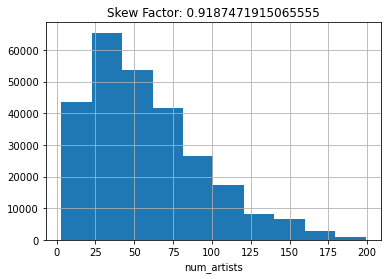

In [15]:
drawHist(df_transformed, positive_skewed[1])

In [16]:
df_transformed = df_modified.copy()
df_transformed = tarnsform_columns(df_modified, positive_skewed, 'p')
df_transformed.head()

,pid,name,description,modified_at,num_artists,num_albums,num_tracks,num_followers,num_edits,playlist_duration_ms,collaborative,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms,album_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,uri,track_href,analysis_url,time_signature,playlist_followers_artist,playlist_followers_album,playlist_followers_track
0,0.00,Throwbacks,NaN,1493424000,3.64,3.87,3.97,0.69,1.95,16.26,0.0,0.00,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,12.33,The Cookbook,0.9,0.81,1.61,-7.11,0,0.11,0.03,6.95e-03,0.05,0.59,4.84,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,4.84,3.14,3.09
1,4.82,w o r k o u t,NaN,1500681600,5.15,5.42,5.51,0.69,3.30,17.84,0.0,4.30,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,12.33,The Cookbook,0.9,0.81,1.61,-7.11,0,0.11,0.03,6.95e-03,0.05,0.59,4.84,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,4.84,3.14,3.09
2,5.39,party playlist,NaN,1504310400,4.32,4.54,4.60,0.69,1.61,16.87,0.0,2.71,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,12.33,The Cookbook,0.9,0.81,1.61,-7.11,0,0.11,0.03,6.95e-03,0.05,0.59,4.84,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,4.84,3.14,3.09
3,5.84,Dance mix,NaN,1473724800,4.72,4.85,5.12,0.69,2.77,17.58,0.0,3.76,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,12.33,The Cookbook,0.9,0.81,1.61,-7.11,0,0.11,0.03,6.95e-03,0.05,0.59,4.84,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,4.84,3.14,3.09
4,5.95,spin,NaN,1505347200,2.64,2.71,2.71,1.10,1.79,15.10,0.0,0.69,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,12.33,The Cookbook,0.9,0.81,1.61,-7.11,0,0.11,0.03,6.95e-03,0.05,0.59,4.84,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,4.84,3.14,3.09


0

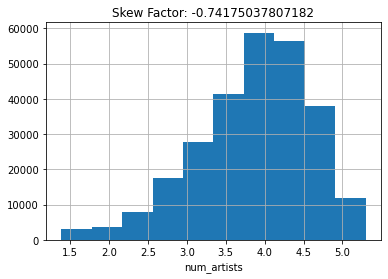

In [17]:
drawHist(df_transformed, positive_skewed[1])

In [20]:
positive_skewed

['pid',
 'num_artists',
 'num_albums',
 'num_tracks',
 'num_followers',
 'num_edits',
 'playlist_duration_ms',
 'collaborative',
 'pos',
 'duration_ms',
 'key',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'playlist_followers_artist',
 'playlist_followers_album',
 'playlist_followers_track']

In [23]:
df_positive=df_transformed[['pid','num_artists','num_albums','num_tracks','num_followers','num_edits','playlist_duration_ms','collaborative','pos','duration_ms','key','speechiness','acousticness','instrumentalness','liveness','valence','tempo','playlist_followers_artist','playlist_followers_album','playlist_followers_track']]

In [24]:
df_positive

,pid,num_artists,num_albums,num_tracks,num_followers,num_edits,playlist_duration_ms,collaborative,pos,duration_ms,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,playlist_followers_artist,playlist_followers_album,playlist_followers_track
0,0.00,3.64,3.87,3.97,0.69,1.95,16.26,0.0,0.00,12.33,1.61,0.11,3.06e-02,6.95e-03,0.05,0.59,4.84,4.84,3.14,3.09
1,4.82,5.15,5.42,5.51,0.69,3.30,17.84,0.0,4.30,12.33,1.61,0.11,3.06e-02,6.95e-03,0.05,0.59,4.84,4.84,3.14,3.09
2,5.39,4.32,4.54,4.60,0.69,1.61,16.87,0.0,2.71,12.33,1.61,0.11,3.06e-02,6.95e-03,0.05,0.59,4.84,4.84,3.14,3.09
3,5.84,4.72,4.85,5.12,0.69,2.77,17.58,0.0,3.76,12.33,1.61,0.11,3.06e-02,6.95e-03,0.05,0.59,4.84,4.84,3.14,3.09
4,5.95,2.64,2.71,2.71,1.10,1.79,15.10,0.0,0.69,12.33,1.61,0.11,3.06e-02,6.95e-03,0.05,0.59,4.84,4.84,3.14,3.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266358,8.29,2.89,4.04,4.58,0.69,2.30,16.93,0.0,3.37,12.37,2.08,0.02,4.72e-02,0.00e+00,0.11,0.53,4.44,5.52,4.38,0.69
266359,8.29,2.89,4.04,4.58,0.69,2.30,16.93,0.0,3.61,12.57,2.30,0.03,4.47e-03,1.01e-02,0.12,0.49,5.16,4.38,0.69,0.69
266360,8.29,2.89,4.04,4.58,0.69,2.30,16.93,0.0,3.64,12.47,2.48,0.05,5.11e-02,8.59e-02,0.06,0.57,4.54,4.38,0.69,0.69
266361,8.29,2.89,4.04,4.58,0.69,2.30,16.93,0.0,3.69,12.42,2.30,0.04,1.41e-01,3.14e-01,0.08,0.47,4.55,4.38,6.34,2.56


In [25]:
df_positive.corr()

,pid,num_artists,num_albums,num_tracks,num_followers,num_edits,playlist_duration_ms,collaborative,pos,duration_ms,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,playlist_followers_artist,playlist_followers_album,playlist_followers_track
pid,1.00e+00,-3.76e-03,-1.11e-03,-2.01e-03,-1.93e-02,2.34e-02,1.89e-03,1.27e-02,-1.22e-03,8.92e-03,2.46e-03,-3.44e-03,-8.99e-03,9.99e-03,-1.43e-03,-9.39e-03,1.55e-03,-6.34e-03,-5.22e-03,-4.11e-03
num_artists,-3.76e-03,1.00e+00,9.30e-01,7.30e-01,1.29e-01,5.83e-01,7.23e-01,-4.60e-03,4.35e-01,2.01e-02,-7.30e-04,1.21e-03,-7.92e-02,-6.24e-02,-3.28e-02,3.77e-02,4.90e-03,-4.38e-02,-1.09e-02,9.63e-02
num_albums,-1.11e-03,9.30e-01,1.00e+00,8.38e-01,1.40e-01,6.16e-01,8.36e-01,-9.16e-03,5.00e-01,4.04e-02,4.62e-03,1.64e-03,-1.15e-01,-8.53e-02,-1.82e-02,5.74e-02,2.03e-02,1.70e-02,-6.55e-03,8.02e-02
num_tracks,-2.01e-03,7.30e-01,8.38e-01,1.00e+00,1.44e-01,5.26e-01,9.88e-01,-2.27e-02,5.96e-01,2.68e-04,7.01e-03,1.69e-02,-6.25e-02,-4.28e-02,1.23e-02,1.51e-02,2.00e-02,3.57e-02,2.39e-02,-2.68e-02
num_followers,-1.93e-02,1.29e-01,1.40e-01,1.44e-01,1.00e+00,1.50e-01,1.46e-01,1.54e-02,8.62e-02,5.50e-03,-6.20e-04,-2.87e-03,-5.69e-03,-4.48e-03,1.99e-03,7.31e-03,-8.00e-05,-1.76e-02,-1.64e-02,-5.39e-03
num_edits,2.34e-02,5.83e-01,6.16e-01,5.26e-01,1.50e-01,1.00e+00,5.26e-01,1.83e-02,3.14e-01,3.19e-02,5.26e-03,3.67e-02,-6.09e-02,-6.97e-02,-8.40e-03,-3.70e-02,1.47e-02,2.29e-02,3.05e-03,3.64e-02
playlist_duration_ms,1.89e-03,7.23e-01,8.36e-01,9.88e-01,1.46e-01,5.26e-01,1.00e+00,-2.00e-02,5.89e-01,5.73e-02,8.02e-03,1.31e-02,-7.13e-02,-1.63e-02,1.55e-02,-3.08e-03,1.81e-02,2.46e-02,8.07e-03,-3.95e-02
collaborative,1.27e-02,-4.60e-03,-9.16e-03,-2.27e-02,1.54e-02,1.83e-02,-2.00e-02,1.00e+00,-1.37e-02,5.36e-03,1.72e-03,-1.43e-02,-1.30e-02,3.00e-02,7.78e-03,7.13e-03,1.14e-02,-2.21e-02,-2.82e-02,-1.92e-02
pos,-1.22e-03,4.35e-01,5.00e-01,5.96e-01,8.62e-02,3.14e-01,5.89e-01,-1.37e-02,1.00e+00,-1.04e-02,2.25e-03,1.42e-02,-3.39e-02,-2.76e-02,6.16e-03,9.41e-03,1.06e-02,-1.98e-02,-2.88e-02,-5.58e-02
duration_ms,8.92e-03,2.01e-02,4.04e-02,2.68e-04,5.50e-03,3.19e-02,5.73e-02,5.36e-03,-1.04e-02,1.00e+00,5.87e-03,-3.49e-02,-9.10e-02,4.52e-02,8.87e-03,-1.55e-01,4.15e-02,3.02e-02,-1.20e-03,1.50e-02


In [26]:
def remove_outliers(df, numericalColumns):
    df1 = df.copy()
    for col in numericalColumns:
        Q1=df1[col].quantile(0.25)
        Q3=df1[col].quantile(0.75)
        IQR=Q3-Q1
        lower=Q1-1.5*IQR
        upper=Q3+1.5*IQR
        df1[col][(df1[col]<lower)]=lower
        df1[col][(df1[col]>upper)]=upper
    return df1

In [27]:
df_cleaned = remove_outliers(df_transformed, numerical_columns)
df_cleaned

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8340\1796915527.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col][(df1[col]<lower)]=lower
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8340\1796915527.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col][(df1[col]>upper)]=upper


,pid,name,description,modified_at,num_artists,num_albums,num_tracks,num_followers,num_edits,playlist_duration_ms,collaborative,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms,album_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,uri,track_href,analysis_url,time_signature,playlist_followers_artist,playlist_followers_album,playlist_followers_track
0,5.23,Throwbacks,NaN,1493424000,3.64,3.87,3.97,0.69,1.95,16.26,0.0,0.65,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,12.33,The Cookbook,0.90,0.81,1.61,-7.11,0,0.11,3.06e-02,1.83e-03,0.05,0.59,4.84,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,4.84,3.14,3.09
1,5.23,w o r k o u t,NaN,1500681600,5.15,5.42,5.51,0.69,3.30,17.84,0.0,4.30,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,12.33,The Cookbook,0.90,0.81,1.61,-7.11,0,0.11,3.06e-02,1.83e-03,0.05,0.59,4.84,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,4.84,3.14,3.09
2,5.39,party playlist,NaN,1504310400,4.32,4.54,4.60,0.69,1.61,16.87,0.0,2.71,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,12.33,The Cookbook,0.90,0.81,1.61,-7.11,0,0.11,3.06e-02,1.83e-03,0.05,0.59,4.84,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,4.84,3.14,3.09
3,5.84,Dance mix,NaN,1473724800,4.72,4.85,5.12,0.69,2.77,17.58,0.0,3.76,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,12.33,The Cookbook,0.90,0.81,1.61,-7.11,0,0.11,3.06e-02,1.83e-03,0.05,0.59,4.84,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,4.84,3.14,3.09
4,5.95,spin,NaN,1505347200,2.64,2.71,2.71,1.10,1.79,15.10,0.0,0.69,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,12.33,The Cookbook,0.90,0.81,1.61,-7.11,0,0.11,3.06e-02,1.83e-03,0.05,0.59,4.84,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,4.84,3.14,3.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266358,8.29,other,NaN,1420848000,2.89,4.04,4.58,0.69,2.30,16.93,0.0,3.37,Jason Mraz,spotify:track:3ce7k1L4EkZppZPz1EJWTS,spotify:artist:4phGZZrJZRo4ElhRtViYdl,Living In The Moment,spotify:album:64SChsjQBiEe3aVTFYnW1b,12.37,Love Is A Four Letter Word,0.65,0.63,2.08,-7.16,1,0.02,4.72e-02,0.00e+00,0.11,0.53,4.44,3ce7k1L4EkZppZPz1EJWTS,spotify:track:3ce7k1L4EkZppZPz1EJWTS,https://api.spotify.com/v1/tracks/3ce7k1L4EkZp...,https://api.spotify.com/v1/audio-analysis/3ce7...,4,5.52,4.38,0.69
266359,8.29,other,NaN,1420848000,2.89,4.04,4.58,0.69,2.30,16.93,0.0,3.61,The Cure,spotify:track:6DW7MN6DCVvTDjtcL5IM9a,spotify:artist:7bu3H8JO7d0UbMoVzbo70s,Pictures Of You - Remix,spotify:album:3jRLyc2t1tExfVpdB88EUm,12.57,Galore - The Singles 1987-1997,0.46,0.74,2.30,-6.10,1,0.03,4.47e-03,1.83e-03,0.12,0.49,5.16,6DW7MN6DCVvTDjtcL5IM9a,spotify:track:6DW7MN6DCVvTDjtcL5IM9a,https://api.spotify.com/v1/tracks/6DW7MN6DCVvT...,ht

In [41]:
scaler = MinMaxScaler()

# transform data
df_scaled = pd.DataFrame(scaler.fit_transform(df_cleaned[numerical_columns]), columns = df_cleaned[numerical_columns].columns)
df_scaled

,pid,modified_at,num_artists,num_albums,num_tracks,num_followers,num_edits,playlist_duration_ms,collaborative,pos,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,playlist_followers_artist,playlist_followers_album,playlist_followers_track
0,0.00,0.85,0.49,0.51,0.48,0.0,0.21,0.42,0.0,0.00e+00,0.50,0.89,0.80,0.65,0.48,0.0,0.61,4.43e-02,1.0,0.11,0.86,0.55,0.0,0.56,0.40,0.48
1,0.00,0.92,0.95,0.99,1.00,0.0,0.54,0.89,0.0,7.51e-01,0.50,0.89,0.80,0.65,0.48,0.0,0.61,4.43e-02,1.0,0.11,0.86,0.55,0.0,0.56,0.40,0.48
2,0.05,0.95,0.70,0.72,0.69,0.0,0.12,0.60,0.0,4.23e-01,0.50,0.89,0.80,0.65,0.48,0.0,0.61,4.43e-02,1.0,0.11,0.86,0.55,0.0,0.56,0.40,0.48
3,0.20,0.66,0.82,0.81,0.87,0.0,0.41,0.82,0.0,6.39e-01,0.50,0.89,0.80,0.65,0.48,0.0,0.61,4.43e-02,1.0,0.11,0.86,0.55,0.0,0.56,0.40,0.48
4,0.23,0.96,0.19,0.15,0.05,0.4,0.17,0.07,0.0,8.28e-03,0.50,0.89,0.80,0.65,0.48,0.0,0.61,4.43e-02,1.0,0.11,0.86,0.55,0.0,0.56,0.40,0.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266358,1.00,0.15,0.26,0.56,0.68,0.0,0.29,0.62,0.0,5.58e-01,0.54,0.58,0.60,0.84,0.47,1.0,0.12,6.82e-02,0.0,0.28,0.77,0.25,0.0,0.65,0.61,0.00
266359,1.00,0.15,0.26,0.56,0.68,0.0,0.29,0.62,0.0,6.09e-01,0.73,0.35,0.73,0.93,0.54,1.0,0.17,6.47e-03,1.0,0.29,0.71,0.78,0.0,0.50,0.00,0.00
266360,1.00,0.15,0.26,0.56,0.68,0.0,0.29,0.62,0.0,6.14e-01,0.64,0.66,0.66,1.00,0.37,1.0,0.27,7.39e-02,1.0,0.15,0.83,0.32,0.0,0.50,0.00,0.00
266361,1.00,0.15,0.26,0.56,0.68,0.0,0.29,0.62,0.0,6.25e-01,0.58,0.68,0.67,0.93,0.46,1.0,0.19,2.03e-01,1.0,0.19,0.68,0.33,0.0,0.50,0.93,0.37


In [42]:
df_new = df_scaled.copy()
happy = pd.Series(data = df_new['valence'], index = df_new['valence'].index, name='happy')
happy[happy>0.5] = 1
happy[happy<0.5] = 0
happy

0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
266358    1.0
266359    1.0
266360    1.0
266361    1.0
266362    0.0
Name: happy, Length: 266363, dtype: float64

In [43]:
df_new.nunique()

pid                           3815
modified_at                    980
num_artists                    161
num_albums                     194
num_tracks                     235
num_followers                    5
num_edits                      124
playlist_duration_ms          3746
collaborative                    1
pos                            248
duration_ms                  36676
danceability                   817
energy                        1175
key                             12
loudness                     12448
mode                             2
speechiness                    886
acousticness                  4601
instrumentalness              2775
liveness                      1220
valence                          2
tempo                        49173
time_signature                   1
playlist_followers_artist      368
playlist_followers_album       258
playlist_followers_track       145
dtype: int64

In [44]:
df_new = df_new.drop(['collaborative', 'time_signature', 'pid', 'modified_at', 'pos','collaborative'], axis=1)
df_new

,num_artists,num_albums,num_tracks,num_followers,num_edits,playlist_duration_ms,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,playlist_followers_artist,playlist_followers_album,playlist_followers_track
0,0.49,0.51,0.48,0.0,0.21,0.42,0.50,0.89,0.80,0.65,0.48,0.0,0.61,4.43e-02,1.0,0.11,1.0,0.55,0.56,0.40,0.48
1,0.95,0.99,1.00,0.0,0.54,0.89,0.50,0.89,0.80,0.65,0.48,0.0,0.61,4.43e-02,1.0,0.11,1.0,0.55,0.56,0.40,0.48
2,0.70,0.72,0.69,0.0,0.12,0.60,0.50,0.89,0.80,0.65,0.48,0.0,0.61,4.43e-02,1.0,0.11,1.0,0.55,0.56,0.40,0.48
3,0.82,0.81,0.87,0.0,0.41,0.82,0.50,0.89,0.80,0.65,0.48,0.0,0.61,4.43e-02,1.0,0.11,1.0,0.55,0.56,0.40,0.48
4,0.19,0.15,0.05,0.4,0.17,0.07,0.50,0.89,0.80,0.65,0.48,0.0,0.61,4.43e-02,1.0,0.11,1.0,0.55,0.56,0.40,0.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266358,0.26,0.56,0.68,0.0,0.29,0.62,0.54,0.58,0.60,0.84,0.47,1.0,0.12,6.82e-02,0.0,0.28,1.0,0.25,0.65,0.61,0.00
266359,0.26,0.56,0.68,0.0,0.29,0.62,0.73,0.35,0.73,0.93,0.54,1.0,0.17,6.47e-03,1.0,0.29,1.0,0.78,0.50,0.00,0.00
266360,0.26,0.56,0.68,0.0,0.29,0.62,0.64,0.66,0.66,1.00,0.37,1.0,0.27,7.39e-02,1.0,0.15,1.0,0.32,0.50,0.00,0.00
266361,0.26,0.56,0.68,0.0,0.29,0.62,0.58,0.68,0.67,0.93,0.46,1.0,0.19,2.03e-01,1.0,0.19,1.0,0.33,0.50,0.93,0.37


<AxesSubplot:>

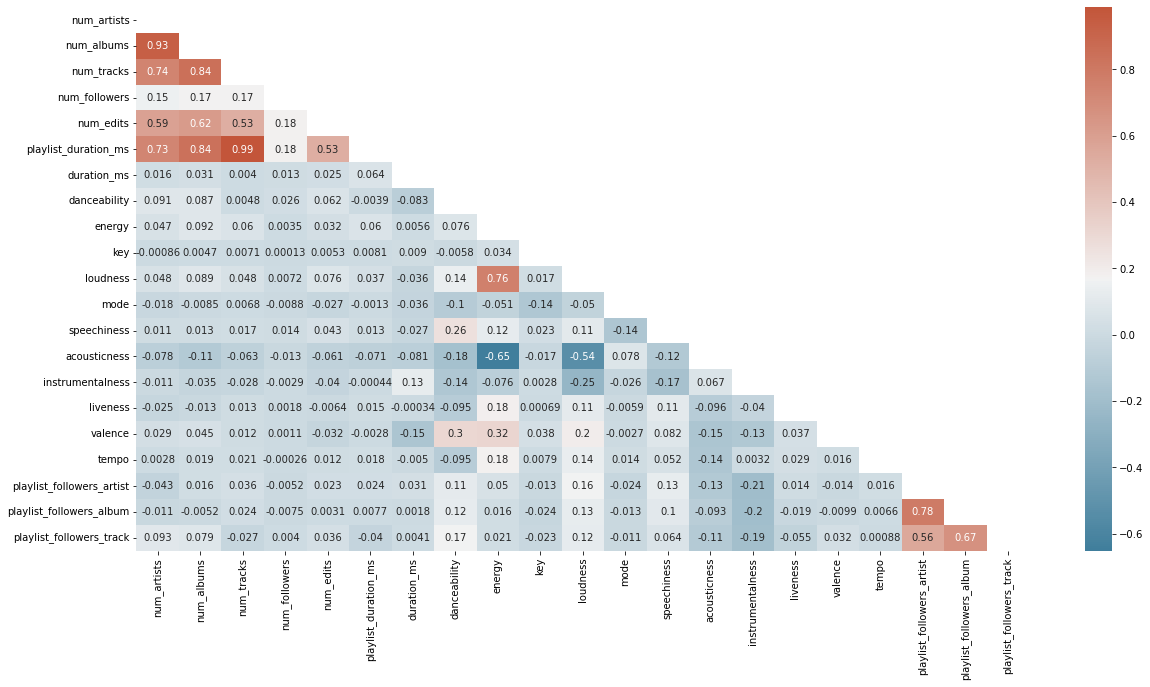

In [45]:
corr = df_new.corr()

# Set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(20, 10))

# Generate a mask for upper traingle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

In [46]:
# Perform PCA to make dimensionality reduction 
pca = PCA()

# Fit the standardized data to the pca
pca=pca.fit(df_new)

In [47]:
# Compute the cumulative proportion of variance explained by the first two principal components
comp_var = pca.explained_variance_ratio_.cumsum()[3]
print("The cumulative variance of the first two principal components is {}".format(
    round(comp_var, 5)))

The cumulative variance of the first two principal components is 0.53568
